**Boston House Price Prediction**  

In this project, I have built a machine learning model to predict house prices using two different algorithms:  
1. **Linear Regression**  
2. **XGBoost Regression**  

Since this is a **regression problem**, the task involves predicting continuous numerical values (house prices) based on input features like the number of rooms, crime rate, and more. This approach allows us to understand how these features influence house prices and make accurate predictions for unseen data.  

In [43]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


In [3]:
#IMPORTING DATASET
House_price_dataset = pd.read_csv('/content/BostonHousing.csv')


In [8]:
print(House_price_dataset)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  3

In [6]:
#DISPLAY FIRST FEW ROWS TO VERIFY THE IMPORT
print(House_price_dataset.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat  medv
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33  36.2


This dataset contains **506 records** and **14 features**, representing various characteristics of homes located in Boston. Each feature provides specific information, such as the number of rooms, crime rate, and property tax, which can help predict house prices in the area.

### Steps of Steps by Step Approch in the Project:

1. **Collecting Data**  
   The first step is gathering the dataset, which contains information about various homes in Boston, such as features like the number of rooms, crime rates, etc., that will help us predict house prices.

2. **Pre-processing Data**  
   The data is not yet ready to be fed into a machine learning model. Pre-processing is required to clean and format the data, handle missing values, and scale the features so the model can process them effectively.

3. **Exploratory Data Analysis (EDA)**  
   In this step, we analyze the dataset to understand the relationships between features. For example, we find correlations between different features (like the number of rooms or crime rates) to see which ones are most closely related to the target variable (house prices).

4. **Splitting Data into Train-Test Split**  
   The data is divided into two sets: one for training the model (training set) and the other for testing the model's performance (test set). This helps ensure the model generalizes well to unseen data.

5. **Feeding the Data to XGBoost Regressor for Prediction**  
   The training data is used to train the **XGBoost Regressor** model, which makes predictions on the test data. This model is known for its efficiency and accuracy in regression tasks.

6. **Evaluation**  
   Finally, the model's performance is evaluated by comparing its predictions with the actual values using metrics like Mean Squared Error (MSE) and R-squared (R²). This step helps us assess how well the model is performing and whether it is a good fit for the problem.

In [7]:
#DISPLAY LAST FEW ROWS
print(House_price_dataset.tail())


        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat  medv
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   9.67  22.4
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08  20.6
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64  23.9
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0  393.45   6.48  22.0
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0  396.90   7.88  11.9


In [9]:
House_price_dataset.shape

(506, 14)

In [10]:
House_price_dataset.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [12]:
House_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
correlation = House_price_dataset.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

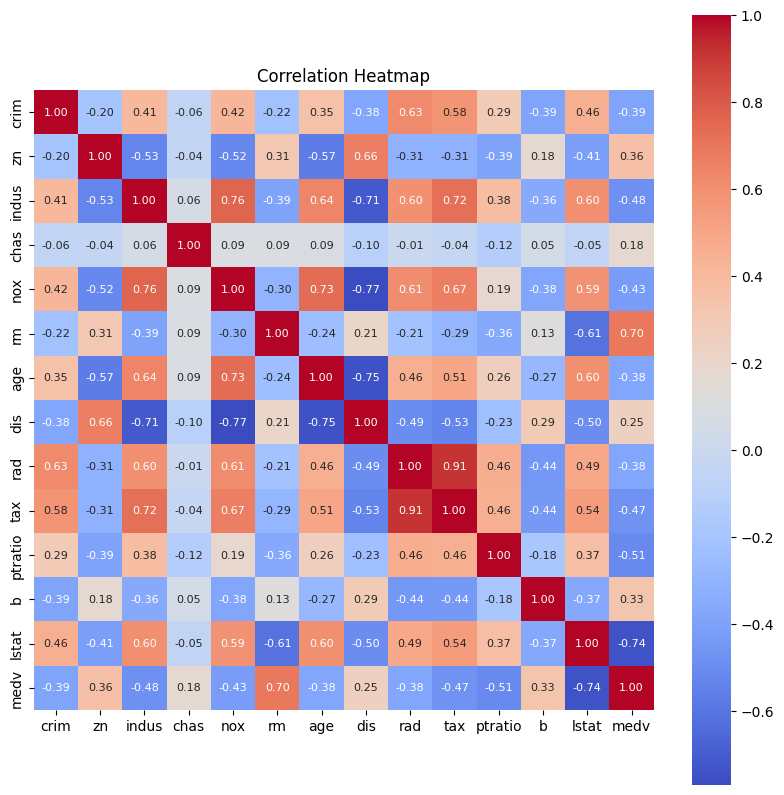

In [21]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show

Splitting the data into train_test_split

In [32]:
# Separate features and target variable
X = House_price_dataset.drop(columns=['medv'])  # Replace 'medv' with the correct target column name in your dataset
Y = House_price_dataset['medv']

In [29]:
print(X)


        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

**Note:**  
The target variable, which represents house prices, was previously named `'MEDV'` in the dataset. Additionally, the prices are in thousands, meaning that the values in the dataset represent the house prices in thousands of dollars. For example, a predicted price of `25` represents `25,000` dollars. Always remember to multiply by 1,000 when interpreting the actual house price.

In [33]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


Splitting the data into train test split

In [34]:
X_train , X_test , Y_train , Y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Standardize the data (optional but recommended for models sensitive to scale)

Standardizing the data is an important step, especially for models like Linear Regression and XGBoost that are sensitive to the scale of the features. Standardization ensures that each feature has a mean of 0 and a standard deviation of 1, which helps the model converge faster and improves performance.

**Why standardizing?**

Some machine learning models (like Linear Regression) are sensitive to the scale of the data. If the features vary widely (e.g., one feature ranges from 1 to 10 and another ranges from 1,000 to 100,000), the model might struggle to learn effectively.
By standardizing the data, all features will contribute equally, allowing the model to learn more efficiently.

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

now we Train the machine learning model
by using
**1)linear regression** and then by
**2)by xgboost regressor**

**1)By using Linear Regression**

In [46]:
model = LinearRegression()
model.fit(X_train_scaled,Y_train)

LinearRegression()

In [47]:
# Making predictions
y_pred = model.predict(X_test_scaled)

In [48]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

Mean Squared Error (MSE): 24.29
R-squared (R2 Score): 0.67


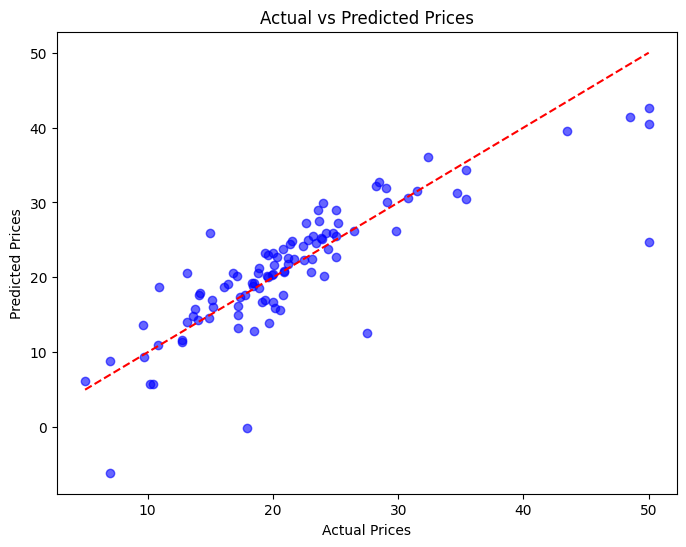

In [55]:
#Visualize Predictions
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred, alpha=0.6, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

now we train model by using xgboost regressor

In [56]:
# loading the model
model = XGBRegressor()

In [57]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evaluating the model by making prediction on training data

In [58]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [59]:
print(training_data_prediction)

[11.990929  19.915493  19.392988  13.408072  18.19098   24.603947
 21.08647   24.697266   8.70618   27.501347  20.708258  36.17404
 31.59529   11.69739   39.802494  13.893334  21.796898  23.695662
 17.590319  24.409176   8.799549  19.181791  25.278059  20.410582
 23.10783   37.90089   15.601625  45.400623  15.706774  22.599428
 14.514692  18.697655  17.797323  16.117708  20.609972  31.598558
 29.095152  15.600668  17.563873  22.51095   19.401443  19.287243
  8.4968405 20.607521  17.006351  17.093975  14.495169  49.98619
 14.284735  12.609954  28.688086  21.203852  19.306932  23.089056
 19.10372   25.004898  33.408142   4.992768  29.599434  18.685545
 21.707012  23.096918  22.802471  20.991085  48.796387  14.627051
 16.613852  27.075224  20.087227  19.794464  20.992268  41.290615
 23.175125  20.378569  18.558722  29.399414  36.40198   24.388987
 11.816533  13.792832  12.272116  17.794773  33.087368  26.73878
 13.393904  14.386449  50.004574  21.98985   19.906004  23.784376
 17.516703  1

Now we find r squared error and mean absolute error which are evaluation metrics.
In the step below we import performance Evaluation metrics like  **mean_squared_error, r2_score** for Model Evaluation.The two key evaluation metrics used here are mean absolute error and R-squared error.they are important for determinig how well a regression model predicts target variables.In the above Model we predict yield(target variable) based on DOY(day of year).
the Error Metrics are discussed below


1) **Mean_squared_error** : Mean Squared Error (MSE) is a measure used metric to calculate and compute the performance of a regression model. It is the average of the squares of the errors, that are the differences in the actual and predicted values.Smaller the MSE, the better the model's predictions are, because it indicates less deviation from the actual values.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (\text{Actual}_i - \text{Predicted}_i)^2
$$

MSE indicates how much is the deviation in  model's predictions are from the actual values.If the MSE is low,the model's predictions are more aligned with the true values. If it's high, the model is less accurate.


Why Square the Errors?: **Squaring the errors ensures that the model penalizes larger mistakes** more heavily than smaller ones, which helps the model focus on minimizing large errors and improving overall accuracy.

2) **r2_score** : r2_score is used for regression problems.It is used when we want to know how well the Model fits the overall data and understand relationship between between values of X and Y axis.


$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2}{\sum_{i=1}^{n} (y_{\text{true}, i} - \bar{y_{\text{true}}})^2}
$$

   
   **Value of R² lies between 0 to 1** where **0 indicates bad relationship** and values close to **1 indicates perfect fit.** **sklearn** model helps to commute the values.For both linear regression and polyniomial regression values which is higher is preffered.

   For Polynomail regression ,high r2_score value is good but watch MSE/RMSE carefullyfor the sign of overfitting,especailly in highere polynomial degree.


   In **Conclusion** R² provides a relative measure of how well the model captures the variance in the data. By using these two metrics, you can evaluate the performance of each model, compare different regression techniques, and understand whether the model is underfitting or overfitting the data. and Higher the R² ,more acceptable the model and lower the MSE better  model.

In [60]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999969829984965
Mean Absolute Error :  0.011182523717974735


Visualizing the actual Prices and predicted prices

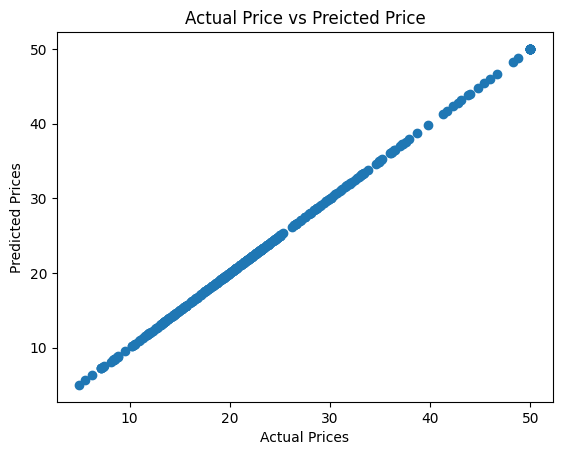

In [63]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

Now predicting on test data.

In [64]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [65]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9057837838492537
Mean Absolute Error :  1.8908873698290656


**Conclusion**

The Boston Housing dataset is used to predict house prices using, first, a baseline of linear regression and, later on, an improved model of XGBoost.

**Linear Regression Model:**
To start with, we used a **Linear Regression** model. It gave us the following results:
• **R-squared value:** 0.8724
• **Mean Absolute Error (MAE):** 2.7099 (on the test set)

These results show that the Linear Regression model generalizes fairly well to the task of house price prediction, with the model explaining about 87% of the variance in the data. The performance was far from perfect, though, with quite a significant room for improvement as evidenced by the relatively high MAE. That implied the model was not able to grasp the complex relationships between the features and the target variable, house prices.

#### XGBoost Model:
To overcome the limitations of Linear Regression, we have moved on to use the **XGBoost Regressor**-one of the power machine learning algorithms that can handle the non-linear relationship between target and predictor variables along with sophisticated patterns in the data. The result for XGBoost was as follows :
Training R-squared value = 0.999997
Training MAE = 0.0112
Test R-squared value = 0.9058
Test MAE = 1.8909

The XGBoost model showed a massive improvement from Linear Regression, with the R-squared perfect in training. The performance on the test was also very strong, at an R-squared of 0.9058, indicating that over 90% of the variance in the test set was explained by the model. The MAE was way lower compared to Linear Regression, which indicated much more accurate predictions.

However, the XGBoost model's performance on the test set was not as perfect as the training set, which is typical of machine learning models. This slight decrease in performance suggests potential **overfitting**, where the model is overly tuned to the training data and may not generalize as well on unseen data.

**Room for Improvement:**

Despite the strong performance of the XGBoost model, there are still areas for improvement:
1. **Overfitting:** The model performed extremely well on the training set, whereas for the test set, performance was slightly lower, which might indicate overfitting. We can try techniques like **cross-validation** to help generalize better on unseen data or tune the hyperparameters.
2. **Hyperparameter Tuning:** The performance of XGBoost can be further enhanced by the use of different **hyperparameter optimization techniques** such as Grid Search or Random Search to find the most suitable set of parameters.

3. **Feature Engineering:** Inclusion of other relevant features or removal of a few irrelevant or redundant ones may further improve the accuracy. Feature interaction and transformation may also yield better results in improving the predictive capability of the model.

4. **Model Comparison:** Although XGBoost outperformed Linear Regression, it would be useful to compare its results with other models such as **Random Forests** or **Gradient Boosting Machines** just to verify that XGBoost is truly the best model for this problem.


**Conclusion** - We can see that we actually improved significantly in predicting house prices by moving from Linear Regression to XGBoost. The XGBoost model gave excellent performance, especially on lower error rates; however, steps for improving its generalization by preventing overfitting can include tuning its hyperparameters, applying regularization, and cross-validation. This project demonstrates the application of a more advanced machine learning model like XGBoost compared to the Linear Regression method; however, there can be a continuous refinement and optimization.